In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train = True, download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train = False, download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset  = torch.utils.data.DataLoader(test,  batch_size=10, shuffle=True)

In [2]:
type(train)

torchvision.datasets.mnist.MNIST

### Building Neural Network

In [3]:
import torch.nn as nn
import torch.nn.functional as F

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # 10 classes
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [5]:
X = torch.rand(28,28)
X = X.view(-1, 28*28)

In [6]:
output = net(X)
output

tensor([[-2.3349, -2.3848, -2.2042, -2.3343, -2.2004, -2.4325, -2.2927, -2.1480,
         -2.3882, -2.3458]], grad_fn=<LogSoftmaxBackward>)

### Training

In [7]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=1e-3)

EPOCHS = 3
for epoch in range (EPOCHS):
    for data in trainset:
        X,y = data
        net.zero_grad()  # make the gradiant equal to Zero
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.5698, grad_fn=<NllLossBackward>)
tensor(0.5478, grad_fn=<NllLossBackward>)
tensor(0.0018, grad_fn=<NllLossBackward>)


In [8]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1, 28 * 28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1

print("Accuracy: ", round(correct/total, 3))    

Accuracy:  0.976


### Predicting

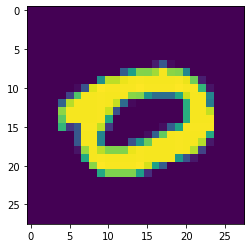

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X[3].view(28,28))
plt.show()

In [15]:
print(torch.argmax(net(X[3].view(-1, 28*28))[0]))

tensor(0)
